In [1]:
!pip install tensorflow_datasets
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorboard import notebook

#Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True)
filename = "raw.csv"
open(filename, 'wb').write(r.content)

4551

In [21]:
%load_ext tensorboard
logs_dir = "/tf/logs/"
%tensorboard --logdir {logs_dir} --bind_all 
notebook.list()

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1013), started 0:20:30 ago. (Use '!kill 1013' to kill it.)

In [4]:
#load the dataset into memory
dataset = pd.read_csv('raw.csv', header=None, names=['sepal_length','sepal_width','petal_length','petal_width','species'])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


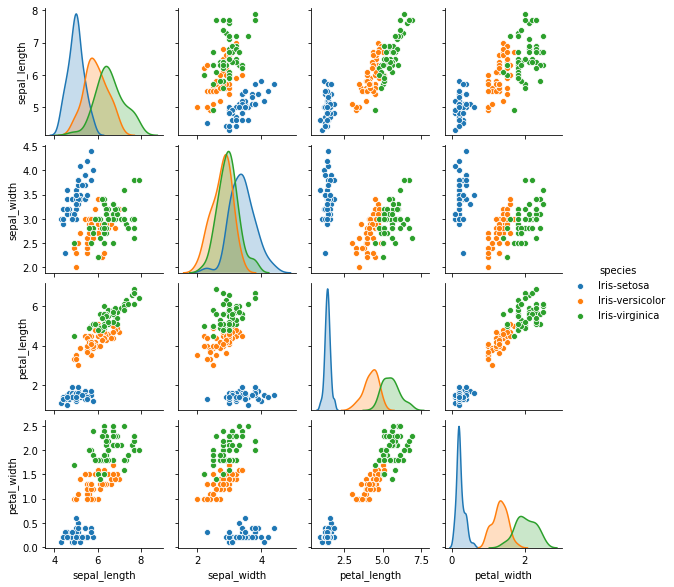

In [5]:
sns.pairplot(dataset, hue="species", height=2, diag_kind="kde")
plt.show()

In [23]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [7]:
encoder = LabelBinarizer()
seed = 42
 
iris = datasets.load_iris()
iris_data_df = pd.DataFrame(data=iris.data, columns=iris.feature_names,
                       dtype=np.float32)
target = encoder.fit_transform(iris.target)
iris_target_df = pd.DataFrame(data=target, columns=iris.target_names) 

In [8]:
X_train,X_test,y_train,y_test = train_test_split(iris_data_df,
                                                 iris_target_df,
                                                 test_size=0.30,
                                                 random_state=seed)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)

In [10]:
def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='tanh', name='layer_1'))
    model.add(Dense(10, activation='tanh', name='layer_2'))
    model.add(Dense(10, activation='tanh', name='layer_3'))
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
cb_1 = ModelCheckpoint(logs_dir, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
cb_2 = TensorBoard(logs_dir)
lista_callbacks=[cb_1,cb_2]

estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)  

In [19]:
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, fit_params={'callbacks': lista_callbacks})
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200

Epoch 00001: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 1.0070 - accuracy: 0.3846
Epoch 2/200

Epoch 00002: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.9926 - accuracy: 0.3846
Epoch 3/200

Epoch 00003: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.9673 - accuracy: 0.4423
Epoch 4/200

Epoch 00004: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.9689 - accuracy: 0.6154
Epoch 5/200

Epoch 00005: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.9339 - accuracy: 0.6346
Epoch 6/200

Epoch 00006: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.9314 - accuracy: 0.6731
Epoch 7/200

Epoch 00007: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.92

Epoch 57/200

Epoch 00057: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.4360 - accuracy: 0.8077
Epoch 58/200

Epoch 00058: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.4419 - accuracy: 0.8077
Epoch 59/200

Epoch 00059: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.4535 - accuracy: 0.8077
Epoch 60/200

Epoch 00060: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.4605 - accuracy: 0.8077
Epoch 61/200

Epoch 00061: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.4327 - accuracy: 0.8077
Epoch 62/200

Epoch 00062: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.4326 - accuracy: 0.8077
Epoch 63/200

Epoch 00063: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - los

3/3 - 0s - loss: 0.2406 - accuracy: 0.9808
Epoch 113/200

Epoch 00113: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.2373 - accuracy: 0.9808
Epoch 114/200

Epoch 00114: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.2374 - accuracy: 0.9808
Epoch 115/200

Epoch 00115: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.2383 - accuracy: 0.9808
Epoch 116/200

Epoch 00116: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.2196 - accuracy: 0.9808
Epoch 117/200

Epoch 00117: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.2101 - accuracy: 0.9808
Epoch 118/200

Epoch 00118: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.2117 - accuracy: 0.9808
Epoch 119/200

Epoch 00119: saving model to /tf/logs/
INFO:tensorflow

INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1126 - accuracy: 0.9808
Epoch 169/200

Epoch 00169: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1039 - accuracy: 0.9808
Epoch 170/200

Epoch 00170: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1082 - accuracy: 0.9808
Epoch 171/200

Epoch 00171: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1076 - accuracy: 0.9808
Epoch 172/200

Epoch 00172: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1063 - accuracy: 0.9808
Epoch 173/200

Epoch 00173: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1023 - accuracy: 0.9808
Epoch 174/200

Epoch 00174: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1122 - accuracy: 0.9808
Epoch 175/200

Epo

3/3 - 0s - loss: 0.7486 - accuracy: 0.8302
Epoch 24/200

Epoch 00024: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.7333 - accuracy: 0.8679
Epoch 25/200

Epoch 00025: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.7169 - accuracy: 0.8679
Epoch 26/200

Epoch 00026: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.6994 - accuracy: 0.8679
Epoch 27/200

Epoch 00027: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.6942 - accuracy: 0.8679
Epoch 28/200

Epoch 00028: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.6769 - accuracy: 0.8679
Epoch 29/200

Epoch 00029: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.6737 - accuracy: 0.8679
Epoch 30/200

Epoch 00030: saving model to /tf/logs/
INFO:tensorflow:Assets

3/3 - 0s - loss: 0.3800 - accuracy: 0.9811
Epoch 80/200

Epoch 00080: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.3720 - accuracy: 0.9811
Epoch 81/200

Epoch 00081: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.3847 - accuracy: 0.9811
Epoch 82/200

Epoch 00082: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.3686 - accuracy: 0.9811
Epoch 83/200

Epoch 00083: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.3872 - accuracy: 0.9811
Epoch 84/200

Epoch 00084: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.3683 - accuracy: 0.9811
Epoch 85/200

Epoch 00085: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.3717 - accuracy: 0.9811
Epoch 86/200

Epoch 00086: saving model to /tf/logs/
INFO:tensorflow:Assets

INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1938 - accuracy: 0.9811
Epoch 136/200

Epoch 00136: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1893 - accuracy: 0.9811
Epoch 137/200

Epoch 00137: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.2068 - accuracy: 0.9811
Epoch 138/200

Epoch 00138: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1880 - accuracy: 0.9811
Epoch 139/200

Epoch 00139: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1956 - accuracy: 0.9811
Epoch 140/200

Epoch 00140: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1946 - accuracy: 0.9811
Epoch 141/200

Epoch 00141: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1872 - accuracy: 0.9811
Epoch 142/200

Epo

Epoch 191/200

Epoch 00191: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1104 - accuracy: 0.9811
Epoch 192/200

Epoch 00192: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1186 - accuracy: 0.9811
Epoch 193/200

Epoch 00193: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1191 - accuracy: 0.9811
Epoch 194/200

Epoch 00194: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1133 - accuracy: 0.9811
Epoch 195/200

Epoch 00195: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1140 - accuracy: 0.9811
Epoch 196/200

Epoch 00196: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0s - loss: 0.1086 - accuracy: 0.9811
Epoch 197/200

Epoch 00197: saving model to /tf/logs/
INFO:tensorflow:Assets written to: /tf/logs/assets
3/3 - 0

In [20]:
print('Best scores are:\n{:.2f}% -> cv1\n{:.2f}% -> cv2'.format(1e2*results[0],1e2*results[1]))

Best scores are:
94.34% -> cv1
94.23% -> cv2
